<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/GLM_covid_mex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv('covid_mex.csv')
df.head()

,date,total_cases,total_deaths
0,2/28/2020,1,0
1,2/29/2020,4,0
2,03/01/20,5,0
3,03/02/20,5,0
4,03/03/20,5,0


In [5]:
df.tail

<bound method NDFrame.tail of            date  total_cases  total_deaths
0     2/28/2020            1             0
1     2/29/2020            4             0
2      03/01/20            5             0
3      03/02/20            5             0
4      03/03/20            5             0
..          ...          ...           ...
668  12/27/2021      3951003        298777
669  12/28/2021      3951946        298819
670  12/29/2021      3956372        298944
671  12/30/2021      3961662        299132
672  12/31/2021      3979723        299428

[673 rows x 3 columns]>

In [ ]:
df.describe()

,total_cases,total_deaths
count,6.730000e+02,673.000000
mean,1.749270e+06,148976.153046
std,1.324332e+06,102152.803185
min,1.000000e+00,0.000000
25%,5.113690e+05,55908.000000
50%,1.841893e+06,156579.000000
75%,2.642068e+06,236015.000000
max,3.979723e+06,299428.000000


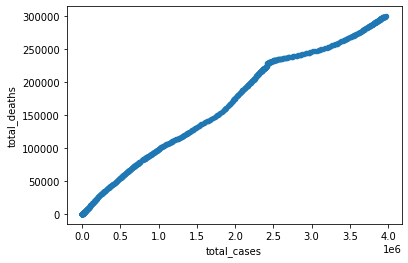

In [ ]:
graf=df.plot("total_cases","total_deaths", kind="scatter")
plt.show()

In [ ]:
scaler = MinMaxScaler()
df[["total_cases_scaled"]] = scaler.fit_transform(df[["total_cases"]])
df[["total_deaths_scaled"]] = scaler.fit_transform(df[["total_deaths"]])
df

,total_cases,total_deaths,total_cases_scaled,total_deaths_scaled
0,1,0,0.000000e+00,0.000000
1,4,0,7.538215e-07,0.000000
2,5,0,1.005095e-06,0.000000
3,5,0,1.005095e-06,0.000000
4,5,0,1.005095e-06,0.000000
...,...,...,...,...
668,3951003,298777,9.927834e-01,0.997826
669,3951946,298819,9.930204e-01,0.997966
670,3956372,298944,9.941325e-01,0.998384
671,3961662,299132,9.954617e-01,0.999011


In [ ]:
scaler = MinMaxScaler()
x = df['total_cases_scaled']
y = df['total_deaths_scaled']

In [ ]:
x=x.to_numpy(x)
y=y.to_numpy(y)
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
df = pd.read_csv('covid_mex.csv', usecols=['total_cases','total_deaths'])
df

,total_cases,total_deaths
0,1,0
1,4,0
2,5,0
3,5,0
4,5,0
...,...,...
668,3951003,298777
669,3951946,298819
670,3956372,298944
671,3961662,299132


In [ ]:
pr = PoissonRegressor(alpha=0, fit_intercept=False,max_iter=1000)
y_pred_pr = pr.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
y_pred_pr


array([1.        , 0.99999968, 0.99999958, 0.99999958, 0.99999958,
       0.99999958, 0.99999958, 0.99999947, 0.99999947, 0.99999937,
       0.99999937, 0.99999937, 0.99999926, 0.99999884, 0.99999737,
       0.99999579, 0.99999452, 0.99999147, 0.99999031, 0.99998768,
       0.99998283, 0.99997872, 0.99997367, 0.99996682, 0.99996145,
       0.99995745, 0.99995008, 0.99993849, 0.99992459, 0.9999108 ,
       0.99989552, 0.99988489, 0.99987215, 0.99985498, 0.99984108,
       0.99982234, 0.99980106, 0.99977442, 0.99974325, 0.99970682,
       0.99966513, 0.99963775, 0.99959532, 0.99955584, 0.99950931,
       0.99947215, 0.99943163, 0.99938447, 0.9993371 , 0.99927627,
       0.99921081, 0.99913041, 0.99907663, 0.99899993, 0.99889019,
       0.99877563, 0.9986453 , 0.99854328, 0.99845547, 0.99836587,
       0.99823728, 0.99812721, 0.99797742, 0.99781819, 0.99767643,
       0.99753111, 0.99738046, 0.99726282, 0.99709383, 0.99688571,
       0.99668561, 0.99648219, 0.99631826, 0.99618133, 0.99597

In [ ]:
pr.intercept_

0.0

In [ ]:
pr.coef_

array([-0.4191579])

Por lo tanto, el modelo quedaria:

y = 0 - 0.4191579x

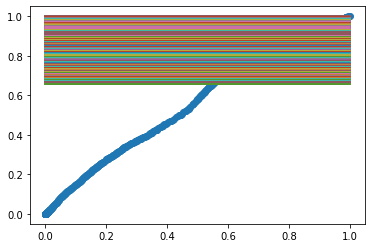

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,[y_pred_pr for i in x])
plt.show()